In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Employee+Demographics.csv')

df.head()

,JobTitle,Sex,Race,JobType,StartYear
0,Management Specialist,M,White,Permanent-Full Time,2000
1,Fire/EMS Lieutenant,M,White,Permanent-Full Time,1996
2,Police Corporal,F,White,Permanent-Full Time,2004
3,Police Chief,M,White,Permanent-Full Time,1990
4,Firefighter/EMT II,M,White,Permanent-Full Time,2003


In [29]:
df.describe()

,StartYear
count,3608.000000
mean,2007.260809
std,8.943149
min,1969.000000
25%,2001.000000
50%,2009.000000
75%,2015.000000
max,2018.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   3608 non-null   object
 1   Sex        3608 non-null   object
 2   Race       3608 non-null   object
 3   JobType    3608 non-null   object
 4   StartYear  3608 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 141.1+ KB


In [31]:
df['JobType'].unique()

array(['Permanent-Full Time', 'Permanent-Part Time',
       'Limited Term Part Time', 'Limited Term Full Time',
       'Overstrength Full Time'], dtype=object)

In [32]:
race_ct = df['Race'].value_counts()
total = df.value_counts().sum() # integer


In [122]:
race_ptgs = round((race_ct/total) * 100,2)
race_ptgs

White                                49.56
Black or African American            27.00
Hispanic or Latino                   15.60
Asian                                 6.32
Unkonwn Race                          0.83
Two or more Races                     0.42
Native Hawaiian or Other Pacific      0.25
American Indian or Alaskan Native     0.03
Name: Race, dtype: float64

In [123]:
sex_counts = df['Sex'].value_counts()
sex_percentages = round((sex_counts / total) * 100,2)
sex_percentages 


M    53.96
F    46.04
Name: Sex, dtype: float64

In [35]:
race_sex_cts = df.groupby(['Race','Sex']).size().reset_index(name='cts').sort_values(by='cts',ascending= False)
race_sex_cts 

,Race,Sex,cts
14,White,M,1047
13,White,F,741
3,Black or African American,F,493
4,Black or African American,M,481
5,Hispanic or Latino,F,303
6,Hispanic or Latino,M,260
2,Asian,M,133
1,Asian,F,95
11,Unkonwn Race,F,19
12,Unkonwn Race,M,11


In [120]:
from textwrap import wrap

def wrapText(texts):
    wrapped_texts = ['\n'.join(wrap(label, 8)) for label in texts]
    return wrapped_texts
def createLabel(ax):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate of text
                height,  # y-coordinate of text
                f'{height:.0f}',  # Text to display
                ha='center', va='bottom', fontsize=10
            )



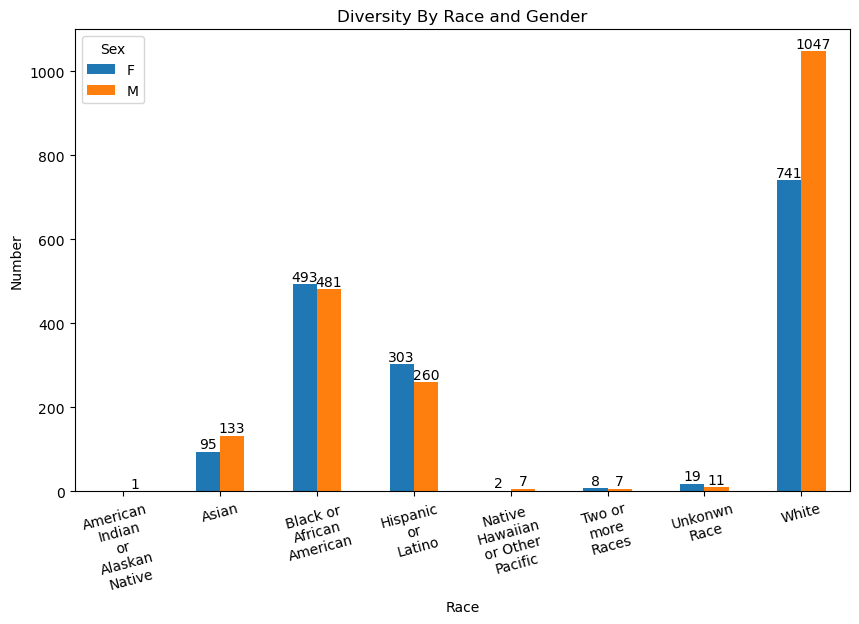

In [121]:
pt1 = race_sex_cts.pivot_table(
    index = 'Race',
    columns='Sex',
    values='cts',
    fill_value= 0)
graph1 = pt1.plot(kind='bar',figsize=(10,6))
graph1.set_xticklabels(wrapText(pt1.index), rotation = 15)
createLabel(graph1)



plt.title("Diversity By Race and Gender")
plt.xlabel("Race")
plt.ylabel("Number")
plt.show()

In [125]:
import math
min_year = math.floor(df.StartYear.min() / 10) * 10
max_year= math.ceil(df.StartYear.max()/ 10)  * 10
bin = list(range(min_year, max_year+ 10,10))


In [126]:
year_label = ['1960-1970',
 '1970-1980',
 '1980-1990',
 '1990-2000',
 '2000-2010',
 '2010-2020']

In [127]:
df['StartYear Between'] = pd.cut(df['StartYear'], bins=bin, labels=year_label)
df.sample(10)

,JobTitle,Sex,Race,JobType,StartYear,StartYear Between
742,Treasury Specialist II,F,Hispanic or Latino,Permanent-Full Time,1998,1990-2000
1415,County Attorney IV,F,White,Permanent-Full Time,2006,2000-2010
3461,Police Officer,F,White,Permanent-Full Time,2017,2010-2020
3211,Firefighter/EMT I,M,White,Permanent-Full Time,2017,2010-2020
3286,Electrician II,M,White,Permanent-Full Time,2017,2010-2020
162,Staff Human Resources Manager,F,White,Permanent-Full Time,2006,2000-2010
404,Librarian,F,White,Permanent-Part Time,1989,1980-1990
990,Human Services Clinical Supervisor,F,Black or African American,Permanent-Full Time,2002,2000-2010
1980,DPR Programmer I,F,Hispanic or Latino,Permanent-Part Time,2010,2000-2010
1785,Deputy Sheriff Corporal,M,White,Permanent-Full Time,2008,2000-2010


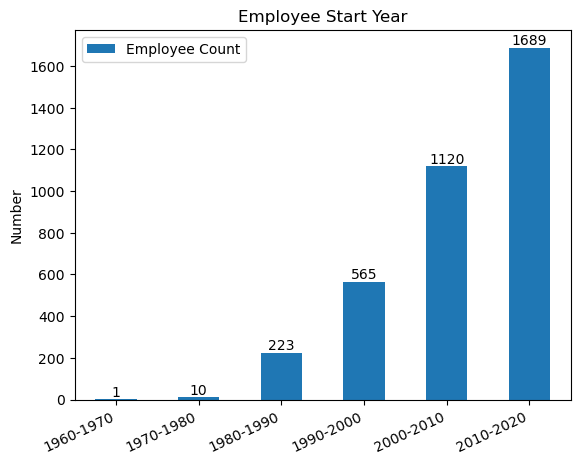

In [ ]:
pt2 = df.pivot_table(
    index='StartYear Between',  # Grouping by year intervals
    aggfunc='size',            # Counting the rows
    sort=False                 # Maintain the order of the intervals as in the data
).reset_index(name="Employee Count")

graph2 = pt2.plot(kind = 'bar')
graph2.set_xticklabels(pt2['StartYear Between'], ha='right', rotation = 25, fontsize = 10)
graph2.set_title('Employee Start Year')
graph2.set_ylabel('Number')

createLabel(graph2)

plt.show()

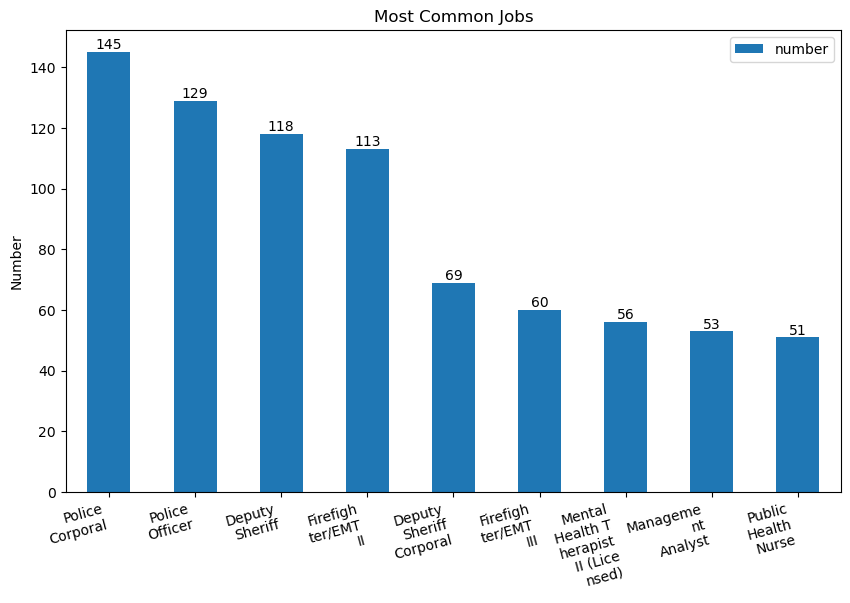

In [157]:
pt3 =df.pivot_table(
    index='JobTitle', 
    aggfunc='size',
    sort = True            # Counting the rows              # Maintain the order of the intervals as in the data
).reset_index(name = 'number').sort_values(by = 'number', ascending = False)


graph3 = pt3[:9].plot(kind = 'bar',figsize = (10,6))

graph3.set_ylabel('Number')
graph3.set_xticklabels(pt3['JobTitle'][:9], ha='right', rotation = 25, fontsize = 10)

graph3.set_xticklabels(wrapText(pt3['JobTitle'][:9]), rotation = 15)
createLabel(graph3)

graph3.set_title('Most Common Jobs')
plt.show()


Text(0, 0.5, 'Number')

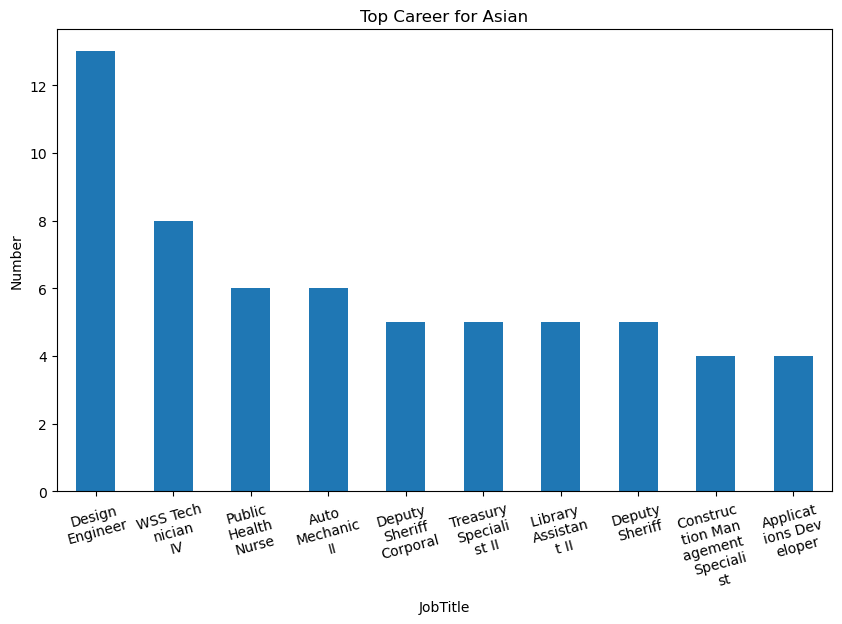

In [156]:
# Create the pivot table
pt4 = df.pivot_table(
    index='Race',           # Grouping by 'Race'
    columns='JobTitle',     # Columns by 'JobTitle'
    aggfunc='size',         # Count the occurrences
    fill_value=0            # Replace NaN with 0 directly in the pivot table
).loc['Asian']

filtered_pt4 = pt4[pt4 > 0].sort_values(ascending=False)

graph4 = filtered_pt4[:10].plot(kind = 'bar', figsize = (10,6))
graph4.set_xticklabels(wrapText(filtered_pt4[:10].index),rotation = 15)

graph4.set_title('Top Career for Asian')
graph4.set_ylabel('Number')

In [150]:
pt4

JobTitle
AED Deputy Director      0
AED Specialist I         0
AED Specialist II        2
AED Specialist III       1
AED Specialist IV        1
                        ..
Zoning Division Chief    0
Zoning Inspector I       0
Zoning Inspector II      0
Zoning Plan Reviewer     1
Zoning Technician        0
Name: Asian, Length: 554, dtype: int64

In [149]:
pt4.index

Index(['AED Deputy Director', 'AED Specialist I', 'AED Specialist II',
       'AED Specialist III', 'AED Specialist IV', 'AED Specialist V',
       'ASAP Administrator', 'ASAP Case Manager', 'ASAP Case Manager Senior',
       'Accountant II',
       ...
       'Wastewater Maintenance Technician',
       'Water, Sewer and Streets Bureau Chief',
       'Water/Sewer Records Coordinator', 'Web Developer', 'Welder',
       'Zoning Division Chief', 'Zoning Inspector I', 'Zoning Inspector II',
       'Zoning Plan Reviewer', 'Zoning Technician'],
      dtype='object', name='JobTitle', length=554)